In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from statsmodels.tsa.arima_model import ARIMA

In [4]:
airlines = pd.read_excel("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Forecasting/Airlines+Data.xlsx")

In [5]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
airlines['Month']=pd.to_datetime(airlines['Month'],infer_datetime_format=True)

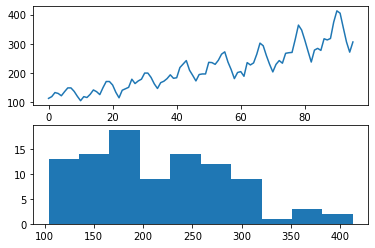

In [8]:
plt.subplot(211)
plt.plot(airlines['Passengers'])
plt.subplot(212)
plt.hist(airlines['Passengers'])
plt.show()

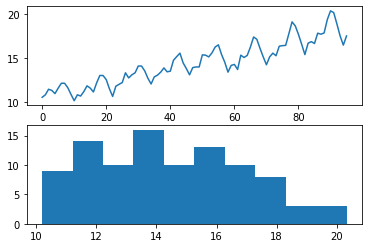

In [9]:
df = np.sqrt(airlines['Passengers'])
plt.subplot(211)
plt.plot(df)
# histogram
plt.subplot(212)
plt.hist(df)
plt.show()

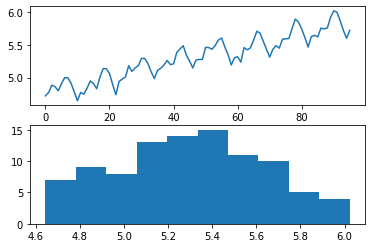

In [10]:
df1 = np.log(airlines['Passengers'])
plt.subplot(211)
plt.plot(df1)
# histogram
plt.subplot(212)
plt.hist(df1)
plt.show()

## Model

In [11]:
Train = airlines.head(84)
Test = airlines.tail(12)

In [12]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


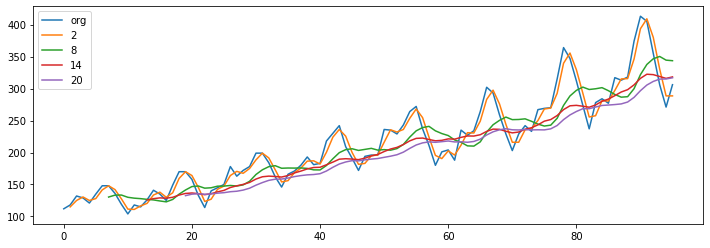

In [13]:
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## ACF and PACF plot

C:\Users\SHIVAM\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


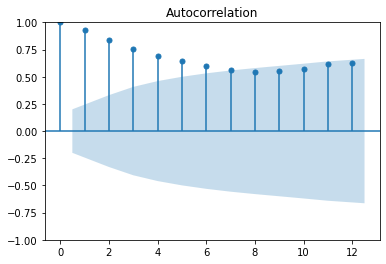

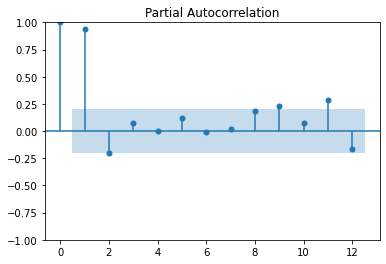

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines['Passengers'],lags=12)
tsa_plots.plot_pacf(airlines['Passengers'],lags=12)
plt.show()

In [15]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [16]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

13.41127474051367

### Holts Winter

In [17]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_16756\2575406107.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.530719652100505

### Holts winter exponential smoothing with additive seasonality and additive trend


In [18]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

5.730286880515042

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [19]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.821091342486879

### ARIMA

In [23]:
data = pd.read_excel("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Forecasting/Airlines+Data.xlsx",header=0,index_col=0, parse_dates=True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [24]:
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 89, Validation_cc 7


In [25]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [26]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from statsmodels.tsa.arima.model import ARIMA


train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

train

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_16756\1049694658.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-01-01    284
2002-02-01    277
2002-03-01    317
2002-04-01    313
2002-05-01    318
Name: 1, Length: 89, dtype: int64

In [27]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [33]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
     mape = (MAPE(test, predictions))
    return mape

In [41]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mape = evaluate_arima_model(train, order)
                    if mape < best_score:
                        best_score, best_cfg = mape, order
                    print('ARIMA%s MAPE=%.3f' % (order,mape))
                except:
                    continue
    print('Best ARIMA%s MAPE=%.3f' % (best_cfg, best_score))

In [42]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MAPE=76.755
ARIMA(0, 0, 1) MAPE=47.347
ARIMA(0, 0, 2) MAPE=36.030
ARIMA(0, 1, 0) MAPE=21.975
ARIMA(0, 1, 1) MAPE=21.907
ARIMA(0, 1, 2) MAPE=22.178
ARIMA(0, 2, 0) MAPE=28.992
ARIMA(0, 2, 1) MAPE=22.314
ARIMA(0, 2, 2) MAPE=22.196
ARIMA(1, 0, 0) MAPE=23.957
ARIMA(1, 0, 1) MAPE=23.991
ARIMA(1, 0, 2) MAPE=25.384
ARIMA(1, 1, 0) MAPE=21.921
ARIMA(1, 1, 1) MAPE=21.879
ARIMA(1, 1, 2) MAPE=23.314
ARIMA(1, 2, 0) MAPE=27.464
ARIMA(1, 2, 1) MAPE=22.219
ARIMA(1, 2, 2) MAPE=22.781
ARIMA(2, 0, 0) MAPE=24.101
ARIMA(2, 0, 1) MAPE=24.113
ARIMA(2, 0, 2) MAPE=25.451
ARIMA(2, 1, 0) MAPE=21.732
ARIMA(2, 1, 1) MAPE=23.823
ARIMA(2, 1, 2) MAPE=27.510
ARIMA(2, 2, 0) MAPE=25.282
ARIMA(2, 2, 1) MAPE=22.064
ARIMA(2, 2, 2) MAPE=23.255
Best ARIMA(2, 1, 0) MAPE=21.732


In [30]:
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [31]:
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.predict(1, 79)

array([386.01917536, 397.40958515, 395.92043024, 413.72669947,
       458.47355898, 481.80988361, 334.94610783, 405.92738247,
       354.12287403, 425.6694042 , 429.79271843, 437.70953429,
       454.28870994, 460.89120915, 452.85150862, 470.4664224 ,
       499.93583965, 488.59422639, 472.92218602, 459.18343065,
       470.97174647, 480.46545485, 487.14021855, 464.31378928,
       463.97746465, 473.89217671, 531.50929712, 662.40113645,
       637.54555698, 585.17277186, 518.01098552, 533.56588069,
       500.87579974, 505.25728223, 503.        , 515.54502461,
       521.14021855, 489.95043955, 506.44388706, 501.92043024,
       447.59280799, 436.38402648, 433.7665687 , 459.18088665,
       459.62996452, 504.46959658, 483.29486832, 466.47292881,
       495.34002617, 500.94789554, 514.46545485, 498.14100678,
       524.47135236, 575.24805249, 578.16178634, 586.39653322,
       629.46959658, 636.52117368, 606.4143073 , 608.90616772,
       633.47531476, 613.7670089 , 614.29046571, 597.71

In [43]:
evaluate_arima_model(X,(2,1,0))

22.061244124297826

### Least MAPE value is given by Holts winter exponential smoothing with multiplicative seasonality and additive trend model.